## Amplitude Estimation in the Coherent Case with AWGN

Consider a scenario where the phase of the signal is known during the symbol interval $ T $, and the goal is to estimate the amplitude $ a $. 

A typical example of this setup is **coherent pulse amplitude modulation (PAM)**, where the received signal samples are given by:

$$
y_i = a s_i + n_i, \quad i = 1, \ldots, k
$$

where:
- $ a $ is the amplitude to be estimated (it can be a random variable or an unknown constant),
- $ s_i $ represents the transmitted signal values
- $ n_i $ denotes additive white Gaussian noise (AWGN)
- $ y_i $ is the received signal

### Maximum-Likelihood (ML) Estimation

From previous section, we know that the ML estimate results by finding the solution to


$$
\sum_{i=1}^k (y_i - s_i(\alpha)) \frac{\partial s_i(\alpha)}{\partial \alpha} = 0
$$

is the first-order condition derived from minimizing the squared error. 

It represents the derivative of the squared error function $ \sum_{i=1}^k (y_i - s_i(\alpha))^2 $ with respect to $ \alpha $, the parameter to be estimated.

In the general case, $ s_i(\alpha) $ is a function of the parameter $ \alpha $, and $ \frac{\partial s_i(\alpha)}{\partial \alpha} $ accounts for how the model $ s_i $ changes with $ \alpha $.

In this problem, $ s_i(\alpha) $ is assumed to be linear with respect to $ \alpha $, specifically:

$$
s_i(\alpha) = a s_i
$$

where $ a $ (equivalent to $ \alpha $) is the unknown parameter to be estimated, and $ s_i $ are fixed signal components (known constants).

This assumption simplifies the derivative $ \frac{\partial s_i(\alpha)}{\partial \alpha} $. 

Since $ \partial s_i(\alpha) / \partial \alpha = \partial (a s_i) / \partial a = s_i $, we have:

$$
\frac{\partial s_i(\alpha)}{\partial \alpha} = s_i
$$

Substitute $ \frac{\partial s_i(\alpha)}{\partial \alpha} = s_i $ into the general equation:

$$
\sum_{i=1}^k (y_i - s_i(\alpha)) \frac{\partial s_i(\alpha)}{\partial \alpha} = 0
$$

becomes:

$$
\sum_{i=1}^k (y_i - s_i(\alpha)) s_i = 0
$$

Using the specific form of $ s_i(\alpha) = a s_i $, substitute this into the equation:

$$
\sum_{i=1}^k (y_i - a s_i) s_i = 0
$$

This is the equation for the **maximum-likelihood estimate** in the specific case of amplitude estimation.

**Solving the Equation**

Solving for $ a $, the ML estimate is:

$$ \boxed{
\hat{a}_{ML} = \frac{1}{\mathcal{E}} \sum_{i=1}^k y_i s_i
}
$$

where:
$$
\mathcal{E} = \sum_{i=1}^k s_i^2
$$
is the **symbol energy**.


This equation reveals that the ML estimate $ \hat{a}_{ML} $ is essentially the output of a **correlator** or a **matched filter**. 

These are widely used in communication systems to maximize the signal-to-noise ratio (SNR) for detecting known signals.

#### Statistical Properties of $ \hat{a}_{ML} $

**Unbiasedness**

The mean of the estimate is:

$$
E[\hat{a}_{ML}] = a
$$

indicating that $ \hat{a}_{ML} $ is an **unbiased estimator**.

**Variance**

The variance of $ \hat{a}_{ML} $ is:

$$
\text{Var}(\hat{a}_{ML}) = \frac{\sigma^2}{\mathcal{E}}
$$

where $ \sigma^2 $ is the noise variance. 

We can see that the estimate's precision improves as the symbol energy $ \mathcal{E} $ increases or the noise variance $ \sigma^2 $ decreases.

####  Cramér-Rao Bound 

Next, we derive the Cramér-Rao bound (CRB) for this scenario.

Recall that the CRB for the variance of an unbiased estimator $ \hat{a} $ is given by:

$$
\sigma_a^2 \geq \frac{1}{-E \left\{ \frac{\partial^2}{\partial a^2} \ln p(\vec{y}|a) \right\}}
$$

Using the same setting in previous Chappter 3, the likelihood function for the observations $ \vec{y} = [y_1, y_2, \ldots, y_k] $ under the AWGN model is:

$$
p(\vec{y}|a) = \prod_{i=1}^k \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[ -\frac{1}{2\sigma^2} (y_i - a s_i)^2 \right]
$$

Taking the logarithm of this likelihood gives the **log-likelihood function**:

$$
\ln p(\vec{y}|a) = -\frac{k}{2} \ln (2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^k (y_i - a s_i)^2
$$

**First Derivative of the Log-Likelihood**

Differentiate $ \ln p(\vec{y}|a) $ with respect to $ a $:

$$
\frac{\partial}{\partial a} \ln p(\vec{y}|a) = -\frac{1}{2\sigma^2} \cdot 2 \sum_{i=1}^k (y_i - a s_i) (-s_i)
$$

Simplify:

$$
\frac{\partial}{\partial a} \ln p(\vec{y}|a) = \frac{1}{\sigma^2} \sum_{i=1}^k (y_i - a s_i) s_i
$$

**Second Derivative of the Log-Likelihood**

Differentiate again with respect to $ a $:

$$
\frac{\partial^2}{\partial a^2} \ln p(\vec{y}|a) = \frac{\partial}{\partial a} \left[ \frac{1}{\sigma^2} \sum_{i=1}^k (y_i - a s_i) s_i \right]
$$

Since $ \frac{\partial}{\partial a} (y_i - a s_i) = -s_i $, we get:

$$
\frac{\partial^2}{\partial a^2} \ln p(\vec{y}|a) = \frac{1}{\sigma^2} \sum_{i=1}^k (-s_i^2)
$$

Simplify:

$$
\frac{\partial^2}{\partial a^2} \ln p(\vec{y}|a) = -\frac{1}{\sigma^2} \sum_{i=1}^k s_i^2
$$

**Expected Value of the Second Derivative**

The expected value of the second derivative (i.e., the Fisher information) is:

$$
E \left\{ \frac{\partial^2}{\partial a^2} \ln p(\vec{y}|a) \right\} = -\frac{1}{\sigma^2} \sum_{i=1}^k s_i^2
$$

Substitute this result into the CRB formula:

$$
\sigma_a^2 \geq \frac{-1}{E \left\{ \frac{\partial^2}{\partial a^2} \ln p(\vec{y}|a) \right\}} = \frac{-1}{-\frac{1}{\sigma^2} \sum_{i=1}^k s_i^2}
$$

Simplify:

$$
\sigma_a^2 \geq \frac{\sigma^2}{\sum_{i=1}^k s_i^2}
$$

Define $ \mathcal{E} = \sum_{i=1}^k s_i^2 $ (the symbol energy). Then:

$$
\boxed{
\sigma_a^2 \geq \frac{\sigma^2}{\mathcal{E}}
}
$$

#### Efficiency of the ML Estimator

From earlier, the variance of the ML estimate $ \hat{a}_{ML} $ is also:

$$
\text{Var}(\hat{a}_{ML}) = \frac{\sigma^2}{\mathcal{E}}
$$

Since the ML estimator achieves the lower bound, it is **efficient**. 

Thus:

$$
\sigma_{\hat{a}}^2 = \frac{\sigma^2}{\mathcal{E}}
$$

### MAP Estimation

In this section, a MAP estimate assumes that $ a $ is a random variable and can be obtained by selecting an *a priori* distribution of $ p(a) $.

Recall from previous section, using $p(\vec{y}|\alpha)$, a MAP estimate to be obtained as the solution to

$$
\frac{1}{\sigma^2} \sum_{i=1}^k (y_i - s_i(\alpha)) \frac{\partial s_i(\alpha)}{\partial \alpha} + \frac{\partial}{\partial \alpha} \ln p(\alpha) = 0
$$

To proceed further, the form of the signal and the a priori pdf $ p(\alpha) $ (if $ \alpha $ is random) must be known.

Note that this is a general equation for parameter estimation, combining the likelihood term (based on the observations) and the prior term (if the parameter is random). 

The prior information is incorporated via $ \ln p(\alpha) $

We assume that

- The parameter $ \alpha $ is represented by $ a $, a random variable.
- $ a $ is modeled as a zero-mean Gaussian random variable with variance $ \sigma_a^2 $.
- $ s_i(\alpha) = a s_i $, indicating a linear dependence of the signal on $ a $.

**Derivative of $ s_i(\alpha) $ with Respect to $ \alpha $ (or $ a $)**

We have 

$$
\frac{\partial s_i(\alpha)}{\partial \alpha} = \frac{\partial (a s_i)}{\partial a} = s_i
$$

Substitute $ \frac{\partial s_i(\alpha)}{\partial \alpha} = s_i $ into the first term:

$$
\frac{1}{\sigma^2} \sum_{i=1}^k (y_i - s_i(\alpha)) \frac{\partial s_i(\alpha)}{\partial \alpha} = \frac{1}{\sigma^2} \sum_{i=1}^k (y_i - a s_i) s_i
$$

**Log Prior for $ a $**

Since $ a $ is zero-mean Gaussian with variance $ \sigma_a^2 $, its prior pdf is:

$$
p(a) = \frac{1}{\sqrt{2\pi \sigma_a^2}} \exp\left(-\frac{a^2}{2\sigma_a^2}\right)
$$

The logarithm of the prior is:

$$
\ln p(a) = -\frac{1}{2} \ln(2\pi \sigma_a^2) - \frac{a^2}{2\sigma_a^2}
$$

The derivative with respect to $ a $ is:

$$
\frac{\partial}{\partial a} \ln p(a) = \frac{\partial}{\partial a} \left(-\frac{a^2}{2\sigma_a^2}\right) = -\frac{a}{\sigma_a^2}
$$

Substitute this into the second term:

$$
\frac{\partial}{\partial \alpha} \ln p(\alpha) = \frac{\partial}{\partial a} \ln p(a) = -\frac{a}{\sigma_a^2}
$$

**Combine the Two Terms**

Substituting both results into the original equation gives:

$$
\frac{1}{\sigma^2} \sum_{i=1}^k (y_i - a s_i) s_i - \frac{a}{\sigma_a^2} = 0
$$

Thus, we have 

$$
\frac{1}{\sigma^2} \sum_{i=1}^k (y_i - a s_i) s_i + \frac{\partial}{\partial a} \left(-\frac{a^2}{2\sigma_a^2}\right) = 0
$$

#### Solving for $ a $

We have that

$$
\frac{1}{\sigma^2} \sum_{i=1}^k (y_i - a s_i) s_i + \frac{\partial}{\partial a} \left(-\frac{a^2}{2\sigma_a^2}\right) = 0
$$

The first term expands as:

$$
\frac{1}{\sigma^2} \sum_{i=1}^k (y_i - a s_i) s_i = \frac{1}{\sigma^2} \left( \sum_{i=1}^k y_i s_i - a \sum_{i=1}^k s_i^2 \right)
$$

The second term is:

$$
\frac{\partial}{\partial a} \left(-\frac{a^2}{2\sigma_a^2}\right) = -\frac{a}{\sigma_a^2}
$$

Substitute these into the equation:

$$
\frac{1}{\sigma^2} \left( \sum_{i=1}^k y_i s_i - a \sum_{i=1}^k s_i^2 \right) - \frac{a}{\sigma_a^2} = 0
$$

**Simplify the Equation**

Multiply through by $ \sigma^2 $ to eliminate the denominator:

$$
\sum_{i=1}^k y_i s_i - a \sum_{i=1}^k s_i^2 - \frac{\sigma^2 a}{\sigma_a^2} = 0
$$

Rearrange terms:

$$
\sum_{i=1}^k y_i s_i = a \sum_{i=1}^k s_i^2 + \frac{\sigma^2 a}{\sigma_a^2}
$$

Factor $ a $ on the right-hand side:

$$
\sum_{i=1}^k y_i s_i = a \left( \sum_{i=1}^k s_i^2 + \frac{\sigma^2}{\sigma_a^2} \right)
$$

**Solve for $ a $**

Divide through by $ \sum_{i=1}^k s_i^2 + \frac{\sigma^2}{\sigma_a^2} $:

$$
a = \frac{\sum_{i=1}^k y_i s_i}{\sum_{i=1}^k s_i^2 + \frac{\sigma^2}{\sigma_a^2}}
$$

The maximum a posteriori (MAP) estimate of $ a $ is:

$$
a = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \frac{\sigma^2}{\sigma_a^2}}
$$

where $ \mathcal{E} = \sum_{i=1}^k s_i^2 $ is the symbol energy.


Thus, we have

$$\boxed{
\hat{a}_{\rm MAP} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \sigma_a^2}
}
$$

We can see that 
- The numerator $ \sum_{i=1}^k y_i s_i $ represents the correlation between the received signal $ y_i $ and the known signal $ s_i $.
- The denominator $ \mathcal{E} + \frac{\sigma^2}{\sigma_a^2} $ combines the symbol energy and the impact of the prior knowledge about $ a $ (its variance $ \sigma_a^2 $).

![](./Figures/fig_11_2.png)
![](./Figures/fig_11_3.png)

### MSE and MAE Estimations

**A Posteriori Probability**

The posterior probability of $ \alpha $ given $ \vec{y} $ is defined by Bayes' theorem:

$$
p(\alpha | \vec{y}) = \frac{p(\alpha)p(\vec{y}|\alpha)}{p(\vec{y})}
$$

Here, $ p(\vec{y}) $ is represented by the constant $ \kappa $, which ensures that $ p(\alpha | \vec{y}) $ integrates to 1. 

Substituting the likelihood $ p(\vec{y}|\alpha) $ and assuming Gaussian noise, the posterior becomes:

$$
p(\alpha | \vec{y}) = \kappa p(\alpha) \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^k (y_i - s_i(\alpha))^2 \right)
$$

The prior $ p(a) $ is assumed to be Gaussian, given by:

$$
p(a) = \frac{1}{\sqrt{2\pi \sigma_a^2}} \exp \left( -\frac{a^2}{2\sigma_a^2} \right)
$$

Substituting this into the posterior expression:

$$
p(a|\vec{y}) = \frac{\kappa}{\sqrt{2\pi\sigma_a^2}} \exp \left( -\frac{a^2}{2\sigma_a^2} \right) \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^k (y_i - a s_i)^2 \right)
$$

Expand $ \sum_{i=1}^k (y_i - a s_i)^2 $:

$$
\sum_{i=1}^k (y_i - a s_i)^2 = \sum_{i=1}^k \left( y_i^2 - 2a s_i y_i + a^2 s_i^2 \right)
$$

Substitute this back into the posterior:

$$
p(a|\vec{y}) = \frac{\kappa}{\sqrt{2\pi\sigma_a^2}} \exp \left( -\frac{a^2}{2\sigma_a^2} \right) \exp \left( -\frac{1}{2\sigma^2} \left[ \sum_{i=1}^k y_i^2 - 2a \sum_{i=1}^k s_i y_i + a^2 \sum_{i=1}^k s_i^2 \right] \right)
$$

Let $ \mathcal{E} = \sum_{i=1}^k s_i^2 $ (symbol energy), and rewrite the summations:

$$
p(a|\vec{y}) = \frac{\kappa}{\sqrt{2\pi\sigma_a^2}} \exp \left( -\frac{a^2}{2\sigma_a^2} \right) \exp \left( -\frac{1}{2\sigma^2} \left[ \sum_{i=1}^k y_i^2 - 2a \sum_{i=1}^k s_i y_i + a^2 \mathcal{E} \right] \right)
$$

**Group Terms into a Gaussian Form**

Combine terms involving $ a $ and $ a^2 $. Note that $ \hat{a}_{MAP} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \sigma^2 / \sigma_a^2} $, so the posterior can be rewritten in a Gaussian form.

Combine terms into a quadratic in $ a $:

$$
-\frac{a^2}{2\sigma_a^2} - \frac{1}{2\sigma^2} \left[ -2a \sum_{i=1}^k s_i y_i + a^2 \mathcal{E} \right]
$$

Factorize the coefficient of $ a^2 $:

$$
-\frac{1}{2} \left[ \frac{1}{\sigma_a^2} + \frac{\mathcal{E}}{\sigma^2} \right] a^2 + \left[ \frac{\sum_{i=1}^k s_i y_i}{\sigma^2} \right] a
$$

Complete the square for $ a $:

$$
-\frac{1}{2} \left[ \frac{1}{\sigma_a^2} + \frac{\mathcal{E}}{\sigma^2} \right] (a - \hat{a}_{MAP})^2
$$

where $ \hat{a}_{MAP} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \sigma^2 / \sigma_a^2} $.

**Final Gaussian Form**

The posterior becomes:

$$
p(a|\vec{y}) = \kappa_0 \exp \left( -\frac{1}{2} \left[ \frac{1}{\sigma_a^2} + \frac{\mathcal{E}}{\sigma^2} \right] (a - \hat{a}_{MAP})^2 \right)
$$

where $ \kappa_0 $ is a constant independent of $ a $:

$$
\kappa_0 = \frac{\kappa}{\sqrt{2\pi\sigma_a^2}} \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^k y_i^2 + \frac{1}{2} \left[ \frac{1}{\sigma_a^2} + \frac{\mathcal{E}}{\sigma^2} \right] \hat{a}_{MAP}^2 \right)
$$

**MAP, MSE, and MAE Estimates**

Since $ p(a|\vec{y}) $ is Gaussian, the **MAP estimate** (maximum of the posterior), **MSE estimate** (mean of the posterior), and **MAE estimate** (mean of the absolute posterior) are the same. The estimates are:

$$\boxed{
\hat{a}_{MAP, MSE, MAE} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \frac{\sigma^2}{\sigma_a^2}}
}
$$

This result shows that the posterior mean and mode align, making the MAP and MSE estimates equivalent.

##### Discussion

**Posterior Distribution as Gaussian**

The posterior $ p(a|\vec{y}) $ is derived as:

$$
p(a|\vec{y}) \propto p(a) \cdot p(\vec{y}|a)
$$

$ p(a) $ is the prior, which is Gaussian:

$$
p(a) = \frac{1}{\sqrt{2\pi\sigma_a^2}} \exp\left(-\frac{a^2}{2\sigma_a^2}\right)
$$

$ p(\vec{y}|a) $ is the likelihood, which is also Gaussian with respect to $ a $:

$$
p(\vec{y}|a) \propto \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^k (y_i - a s_i)^2\right)
$$

When we combine these terms, the posterior $ p(a|\vec{y}) $ takes the form:

$$
p(a|\vec{y}) \propto \exp\left(-\frac{1}{2} \left[ \frac{1}{\sigma_a^2} + \frac{\mathcal{E}}{\sigma^2} \right] (a - \hat{a}_{MAP})^2 \right)
$$


Since this posterior is a Gaussian distribution, it is completely characterized by its **mean** ($ \hat{a}_{MAP} $) and **variance** ($ [\frac{1}{\sigma_a^2} + \frac{\mathcal{E}}{\sigma^2}]^{-1} $).

**Equivalence of MAP, MSE, and MAE**

The **MAP estimate** is the value of $ a $ that maximizes the posterior $ p(a|\vec{y}) $. For a Gaussian distribution, the maximum occurs at the **mean**. Therefore:

$$
\hat{a}_{MAP} = \text{mean of } p(a|\vec{y})
$$

The **MSE estimate** is the value of $ a $ that minimizes the mean squared error:

$$
\hat{a}_{MSE} = E[a|\vec{y}]
$$

For a Gaussian posterior, the **mean** also minimizes the mean squared error. Thus:

$$
\hat{a}_{MSE} = \text{mean of } p(a|\vec{y}) = \hat{a}_{MAP}
$$

The **MAE estimate** is the value of $ a $ that minimizes the mean absolute error. For a symmetric Gaussian distribution, the mean also minimizes the mean absolute error. Thus:

$$
\hat{a}_{MAE} = \text{mean of } p(a|\vec{y}) = \hat{a}_{MAP}
$$

When $ p(a|\vec{y}) $ is Gaussian, symmetry and unimodality of the Gaussian posterior make the **mean**, **mode**, and **median** identical.

The normalizing constant $ \kappa_0 $ is independent of $ a $ and ensures that the posterior integrates to 1. 

While $ \kappa_0 $ is important for computing the full posterior, it does not affect the MAP, MSE, or MAE estimates because these depend only on the mean and variance of the Gaussian posterior.

Thus, since the posterior $ p(a|\vec{y}) $ is Gaussian:

**MAP**, **MSE**, and **MAE** estimates are all equivalent and equal to the mean of the posterior:  

$$
\boxed{\hat{a}_{MAP, MSE, MAE} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \sigma^2 / \sigma_a^2}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 100  # number of samples
sigma = 1  # standard deviation of noise
sigma_a = 1  # standard deviation of prior (MAP)

s_i = np.random.randn(k)  # transmitted signal samples
E = np.sum(s_i**2)  # symbol energy

# a is a zero-mean Gaussian random variable with variance sigma_a^2

# Generate random amplitudes based on the prior
num_trials = 1000  # number of Monte Carlo trials for simulation
a_true_samples = np.random.randn(num_trials) * sigma_a  # true amplitudes sampled from N(0, sigma_a^2)

# Arrays to store estimates
a_ML_samples = []
a_MAP_samples = []
a_MSE_samples = []
a_MAE_samples = []

# Monte Carlo simulation
for a_true in a_true_samples:
    # Generate received signal
    y_i = a_true * s_i + np.random.randn(k) * sigma

    # ML estimate
    a_ML = np.sum(y_i * s_i) / E
    a_ML_samples.append(a_ML)

    # MAP estimate
    a_MAP = np.sum(y_i * s_i) / (E + sigma**2 / sigma_a**2)
    a_MAP_samples.append(a_MAP)

In [2]:
# Select a random subset of 100 true amplitudes and their corresponding estimates
random_indices = np.random.choice(num_trials, 100, replace=False)
a_true_subset = a_true_samples[random_indices]
a_ML_subset = np.array(a_ML_samples)[random_indices]
a_MAP_subset = np.array(a_MAP_samples)[random_indices]


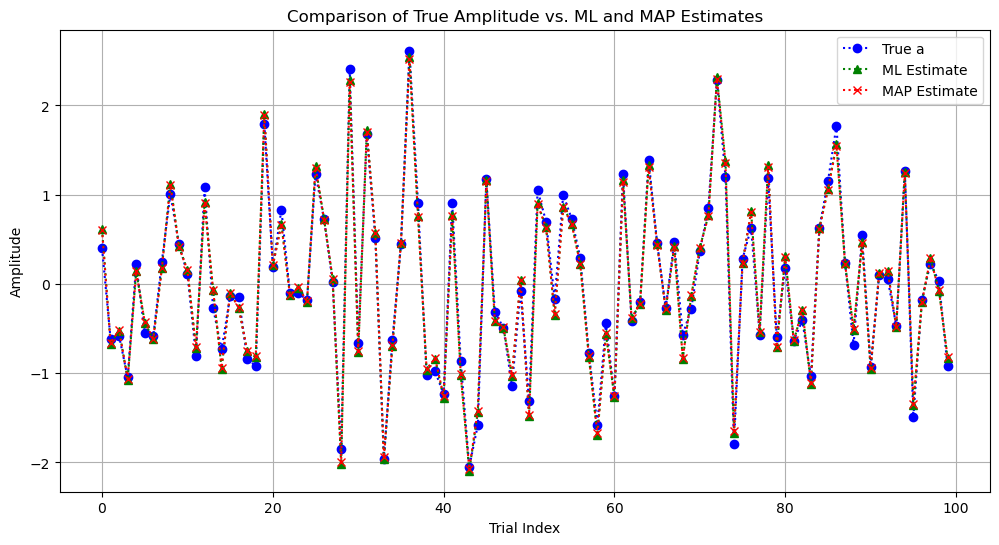

In [3]:
# Plot the results with the x-axis as the index of trials
plt.figure(figsize=(12, 6))

# Plot estimates against trial index
plt.plot(range(100), a_true_subset, label="True a", marker="o", linestyle=":", color="blue")
plt.plot(range(100), a_ML_subset, label="ML Estimate", marker="^", linestyle=":", color="green")
plt.plot(range(100), a_MAP_subset, label="MAP Estimate", marker="x", linestyle=":", color="red")

# Customize plot
plt.title("Comparison of True Amplitude vs. ML and MAP Estimates")
plt.xlabel("Trial Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


#### Linear and Non-Linear Estimates

**Linear Estimate**

An estimate is **linear** if it is a weighted linear combination of the observed data $ y_i $, without introducing additional terms or nonlinear transformations. 

In the given estimate:

$$
\hat{a}_{MAP} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \frac{\sigma^2}{\sigma_a^2}}
$$

the numerator $ \sum_{i=1}^k y_i s_i $ is a linear combination of the observations $ y_i $, and the weights ($ s_i $) are fixed and independent of $ y_i $.

Thus, the resulting estimate $ \hat{a}_{MAP} $ is **linear** in $ y_i $.


**Effect of Nonzero Mean for $ a $**

If the prior mean of $ a $ is **nonzero** (e.g., $ E[a] = \mu_a $), the prior pdf changes from a zero-mean Gaussian to:

$$
p(a) = \frac{1}{\sqrt{2\pi \sigma_a^2}} \exp\left(-\frac{(a - \mu_a)^2}{2\sigma_a^2}\right)
$$

The MAP estimate then incorporates the mean $ \mu_a $ as a constant term:

$$
\hat{a}_{MAP} = \mu_a + \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \frac{\sigma^2}{\sigma_a^2}}
$$

This modification introduces a **constant offset ($ \mu_a $)**, which is independent of the observations $ y_i $.

**Nonlinearity is Introduced**

When the prior mean $ \mu_a $ is nonzero, the estimate includes the **additive term $ \mu_a $**, making it no longer purely a linear combination of $ y_i $.

This is because the offset term $ \mu_a $ does not depend on $ y_i $, breaking the strict linearity.


### Properties of the Estimation

We focus on the **bias** of the MAP estimate and how it behaves under certain conditions, particularly at high signal-to-noise ratio (SNR), resulting **asymptotically unbiased**. 

we have that the MAP estimate for $ a $ is given by:

$$
\hat{a}_{MAP} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \sigma^2 / \sigma_a^2}
$$

Taking the expectation $ E\{\hat{a}_{MAP}\} $:

$$
E\{\hat{a}_{MAP}\} = \frac{1}{\mathcal{E} + \sigma^2 / \sigma_a^2} E\left\{\sum_{i=1}^k y_i s_i\right\}
$$

From the observation model $ y_i = a s_i + n_i $, we know:

$$
E\{y_i\} = E\{a\} s_i
$$

so:

$$
E\{\sum_{i=1}^k y_i s_i\} = E\{a\} \sum_{i=1}^k s_i^2 = E\{a\} \mathcal{E}
$$

Substitute this into the expression for $ E\{\hat{a}_{MAP}\} $:

$$
E\{\hat{a}_{MAP}\} = \frac{E\{a\} \mathcal{E}}{\mathcal{E} + \sigma^2 / \sigma_a^2}
$$

**Bias of the MAP Estimate**

The **bias** of an estimate is defined as:

$$
\text{Bias} = E\{\hat{a}_{MAP}\} - E\{a\}
$$

Here:

$$
\text{Bias} = E\{a\} \left( \frac{\mathcal{E}}{\mathcal{E} + \sigma^2 / \sigma_a^2} - 1 \right)
$$

The term $ \frac{\mathcal{E}}{\mathcal{E} + \sigma^2 / \sigma_a^2} $ is always less than 1, so $ \hat{a}_{MAP} $ is **biased** unless $ E\{a\} = 0 $. 

The bias depends on the signal-to-noise ratio (SNR).

**Asymptotic Unbiasedness at High SNR**

The signal-to-noise ratio (SNR) is defined as $ \mathcal{E} / \sigma^2 $. Rewriting the denominator in the MAP estimate:

$$
\mathcal{E} + \sigma^2 / \sigma_a^2 = \mathcal{E} \left(1 + \frac{\sigma^2}{\mathcal{E} \sigma_a^2}\right)
$$

When $ \mathcal{E} / \sigma^2 \gg 1 / \sigma_a^2 $ (i.e., high SNR), the term $ \frac{\sigma^2}{\mathcal{E} \sigma_a^2} $ becomes negligible, and the denominator simplifies to:

$$
\mathcal{E} + \sigma^2 / \sigma_a^2 \approx \mathcal{E}
$$

Thus, the MAP estimate becomes approximately:

$$
\hat{a}_{MAP} \approx \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E}}
$$

This is equivalent to the ML estimate, which is unbiased.

Therefore, as $ \mathcal{E} / \sigma^2 \to \infty $, the MAP estimate becomes **asymptotically unbiased**.

### Estimating Structures

The MAP and ML estimating structures, are depicted in Figures 11.2 and 11.3 [B2], respectively. 

![](./Figures/fig_11_2_3.png)

The MAP estimate is 

$$
\hat{a}_{MAP} = \frac{\sum_{i=1}^k y_i s_i}{\mathcal{E} + \sigma_a^2}
$$

The ML estimate is:

$$
\hat{a}_{ML} = \frac{1}{\mathcal{E}} \sum_{i=1}^k y_i s_i
$$


Note that both structures are linear and differ only in the final gain factor.

### Continuous Forms

The continuous form of the ML estimate can be obtained as

$$
\hat{a}_{ML} = \frac{1}{\mathcal{E}} \int_0^T y(t) s(t) \, dt
$$

where

$$
\mathcal{E} = \int_0^T s^2(t) \, dt
$$

Similarly, a continuous form of the MAP estimate can be obtained as

$$
\hat{a}_{MAP} = \frac{1}{\mathcal{E} + \sigma^2 / \sigma_a^2} \int_0^T y(t) s(t) \, dt
$$